<h1 align="center">Deep Learning</h1>
<h4 align="center">Dr. Fatemi Zadeh</h4>
<h4 align="center">Sharif University of Technology, Fall 2024</h4>
<h4 align="center">Practical Assignment 3 </h4>



**Student Name**: Radin Khayyam

**Student ID**: 99101579

---

# **Question 3:**

In this question, we examine a classification problem using Transfer Learning. For feature extraction, you can use well-known convolutional networks that have been pre-trained on the extensive ImageNet dataset and are available in Torchvision.

---

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image
import requests
import json

# **Part a:**

Using Torchvision, implement the MobileNetV2 network with pre-trained weights. Briefly explain the architecture of this network, its input dimensions, the necessary preprocessing for inputs, and the dimensions of its outputs.

---

**Architecture**:  

MobileNetV2 is a lightweight convolutional neural network designed for mobile and embedded devices. It introduces an efficient building block called the **inverted residual block**, which uses depthwise separable convolutions to reduce computational cost while maintaining accuracy. The architecture consists of:
   - A convolutional stem followed by several bottleneck layers (inverted residuals).
   - A global average pooling layer.
   - A fully connected layer for classification (1000 classes for ImageNet).

**Input Dimensions**:  

   MobileNetV2 expects input tensors of size \( (B, 3, 224, 224) \), where:
   - \( B \) is the batch size.
   - \( 3 \) corresponds to RGB channels.
   - $( 224 \times 224 )$ is the spatial dimension of the image.

**Preprocessing**:
   - **Resizing**: Resize the input image to $( 224 \times 224 )$.
   - **Normalization**: Normalize pixel values using the mean and standard deviation of the ImageNet dataset: mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].
   - **Tensor Conversion**: Convert the input image to a PyTorch tensor.

**Output Dimensions**: 

The final output is a tensor of shape (B, 1000), representing the predicted probabilities for each of the 1000 classes in the ImageNet dataset.



In [15]:
# Load the MobileNetV2 model with pretrained weights
mobilenet_v2 = models.mobilenet_v2(pretrained=True)

# **Part b:**

Consider a high-quality color image that belongs to one of the recognizable classes of the MobileNetV2 model. Preprocess this image and obtain the output of the MobileNetV2 network. Identify the names of the top three predicted classes with the highest probabilities.

---

* Preprocessing: Resize the input to 224×224, normalize it with ImageNet mean and standard deviation.

* Input Dimensions: 3×224×224.

* Output Dimensions: A vector of size 1000 (logits for ImageNet classes).


**Selected Image:**

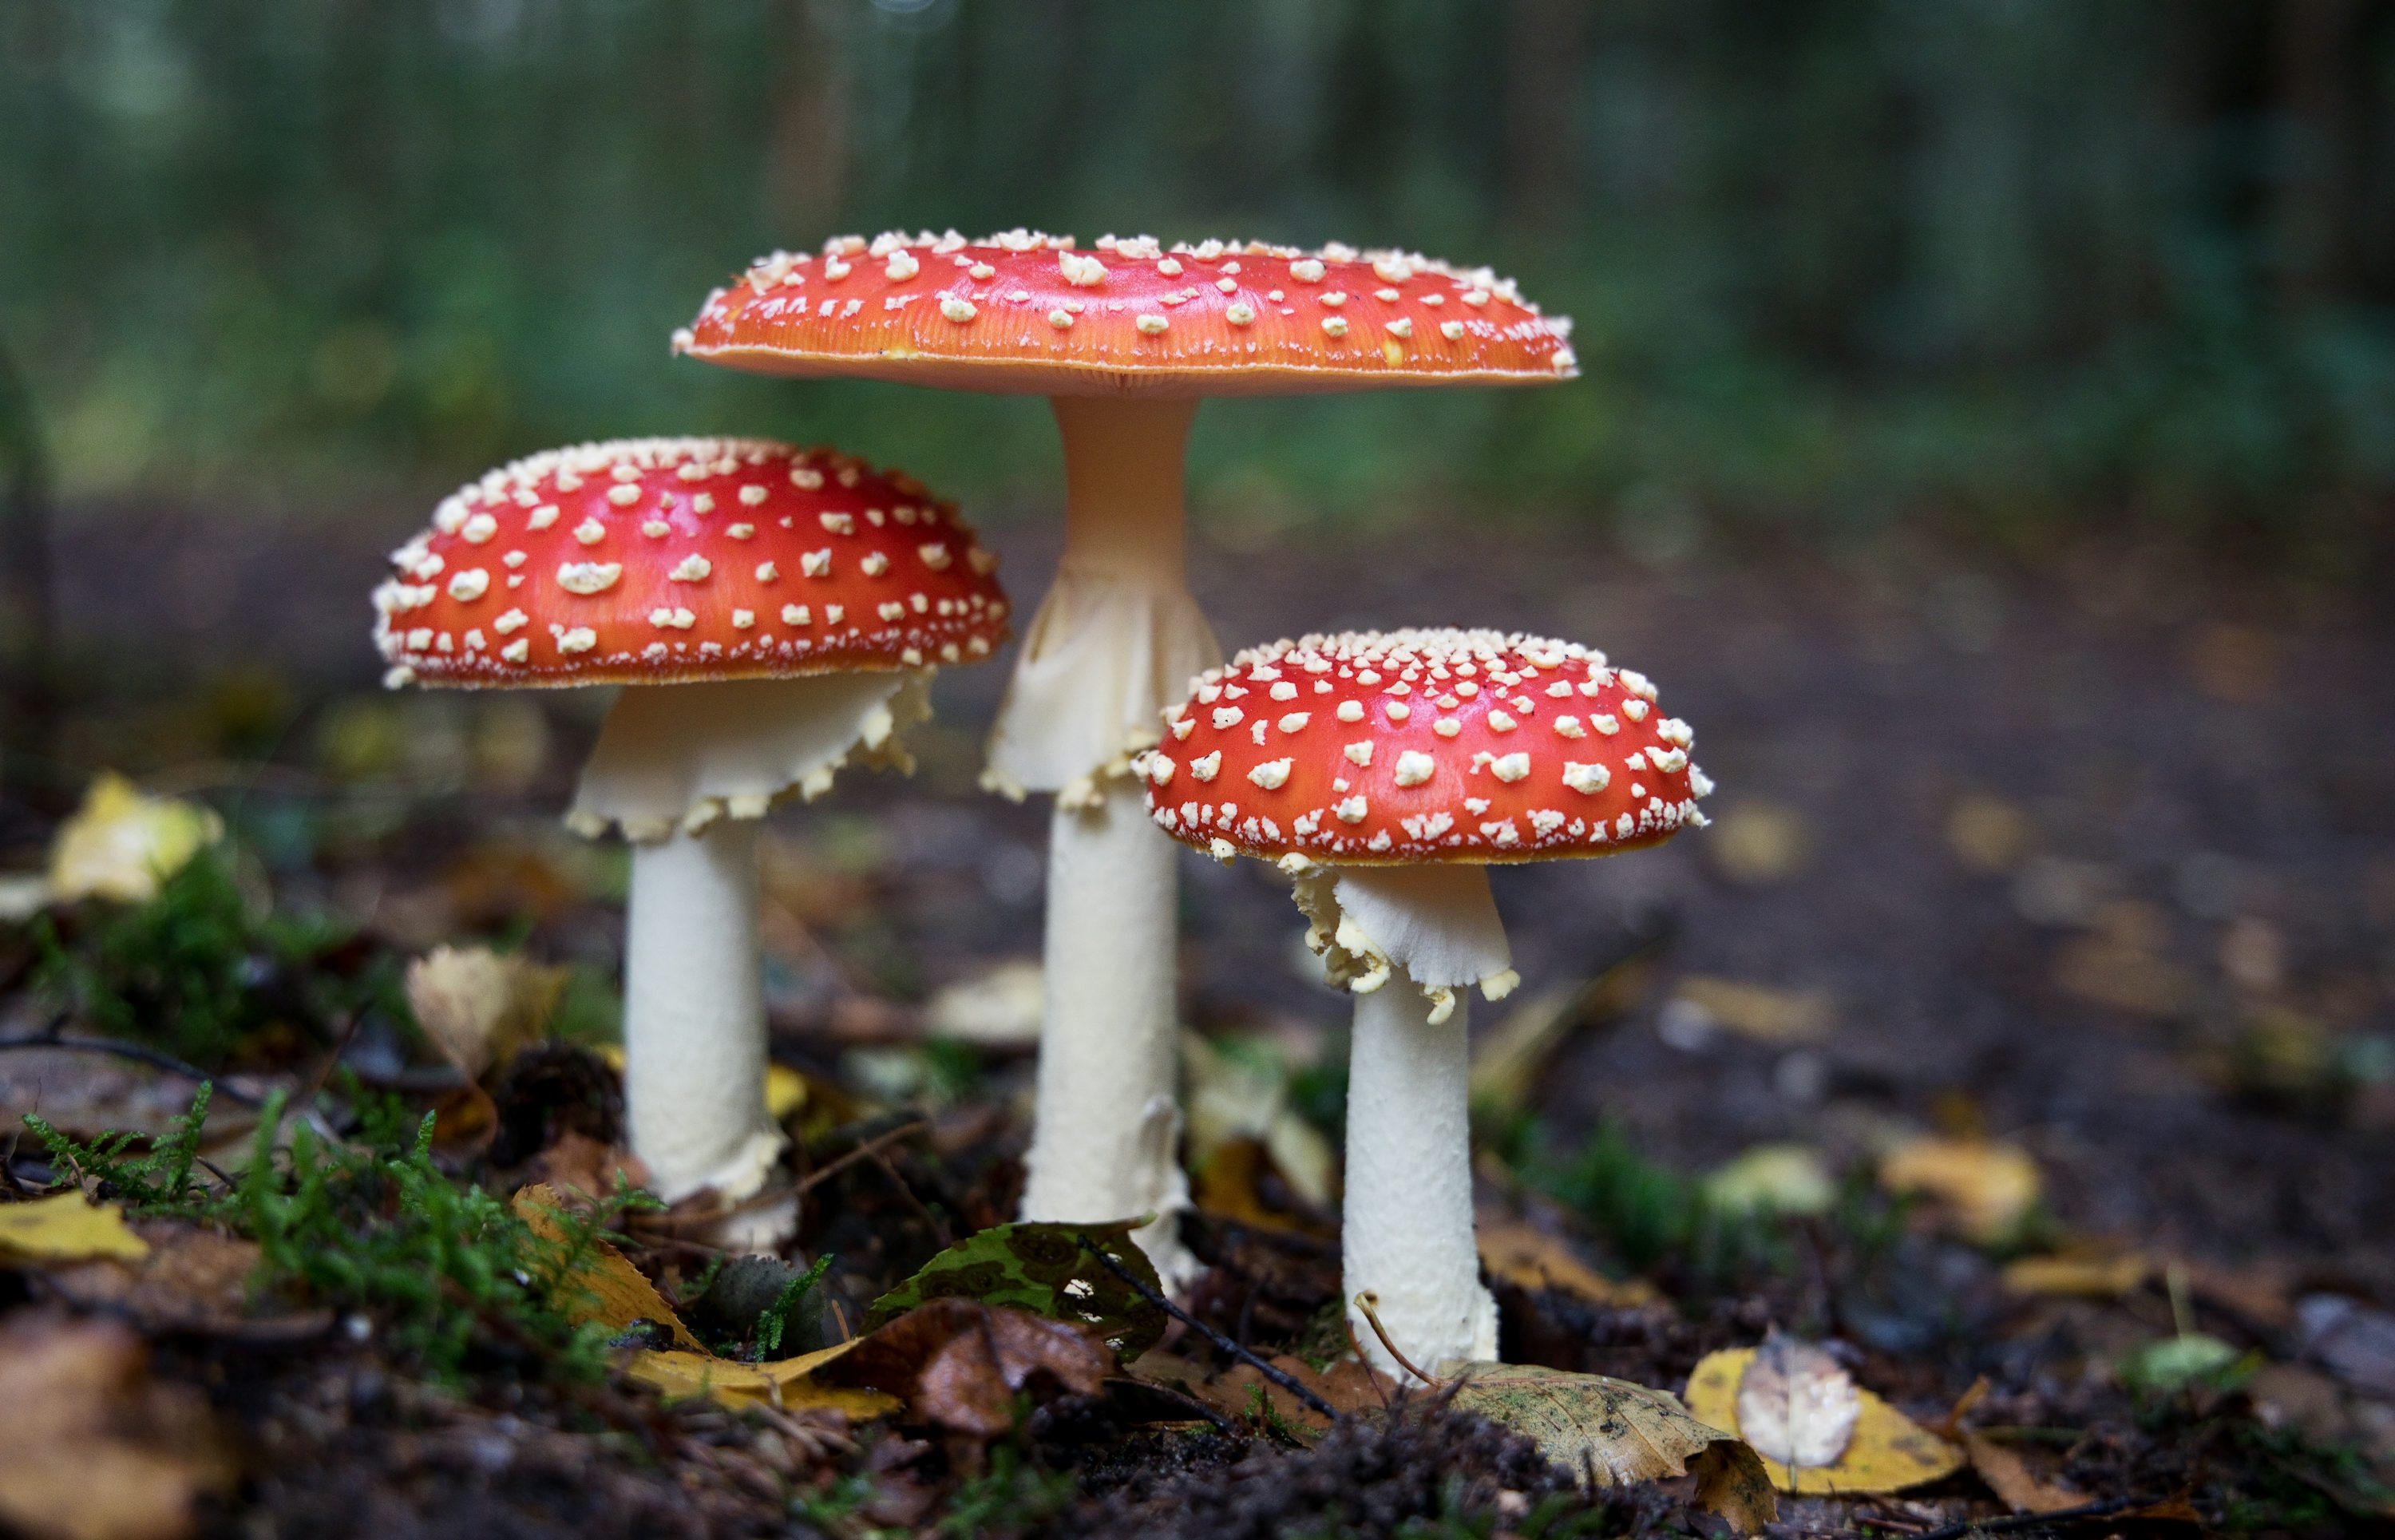

In [16]:
# Load the MobileNetV2 model with pre-trained weights
mobilenet_v2 = models.mobilenet_v2(pretrained=True)
mobilenet_v2.eval()  # Set the model to evaluation mode

# Load and preprocess the image
image_path = '/kaggle/input/image-sample-mobilenet/img_sample.jpeg' 
image = Image.open(image_path).convert('RGB')

# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),        # Resize the image to 224x224
    transforms.ToTensor(),               # Convert the image to a tensor
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],      # Normalization mean for ImageNet
        std=[0.229, 0.224, 0.225]        # Normalization std for ImageNet
    )
])

# Apply preprocessing
input_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

# Perform inference
with torch.no_grad():
    output = mobilenet_v2(input_tensor)

# Get the top 3 class indices and probabilities
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top3_prob, top3_indices = torch.topk(probabilities, 3)

# Load ImageNet class labels
imagenet_classes_url = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
imagenet_classes = requests.get(imagenet_classes_url).json()

# Map indices to class names
top3_classes = [imagenet_classes[idx] for idx in top3_indices]

# Print the top 3 classes and probabilities
for i in range(3):
    print(f"Class: {top3_classes[i]}, Probability: {top3_prob[i].item():.4f}")


Class: agaric, Probability: 0.8945
Class: mushroom, Probability: 0.1054
Class: hen-of-the-woods, Probability: 0.0000


# **Part c:**

Use the Oxford 102 Flower dataset for classification, which includes 8,189 images of 102 different flower classes. For more details on the dataset, refer to the provided links. Assume the input image is resized to 224×224 pixels, and use the MobileNetV2 network for feature extraction. Add classification layers to the network. Use the Cross Entropy Loss function to train the network for classifying the 102 classes of the dataset. In this task, assume that the weights of the feature extraction part (pre-trained on ImageNet) are frozen, and only the classification layers need to be initialized and trained.

Report the following:

* Plot the changes in accuracy and loss for training and validation data over epochs.

* After completing the training, calculate and report the accuracy and loss for training, validation, and test datasets.

---

Epoch [1/10], Train Loss: 4.3585, Val Loss: 3.2819
Epoch [2/10], Train Loss: 2.4398, Val Loss: 2.1264
Epoch [3/10], Train Loss: 1.3901, Val Loss: 1.5523
Epoch [4/10], Train Loss: 0.8507, Val Loss: 1.2568
Epoch [5/10], Train Loss: 0.5861, Val Loss: 1.0811
Epoch [6/10], Train Loss: 0.4107, Val Loss: 0.9550
Epoch [7/10], Train Loss: 0.3036, Val Loss: 0.8779
Epoch [8/10], Train Loss: 0.2521, Val Loss: 0.8312
Epoch [9/10], Train Loss: 0.1996, Val Loss: 0.7719
Epoch [10/10], Train Loss: 0.1672, Val Loss: 0.7468


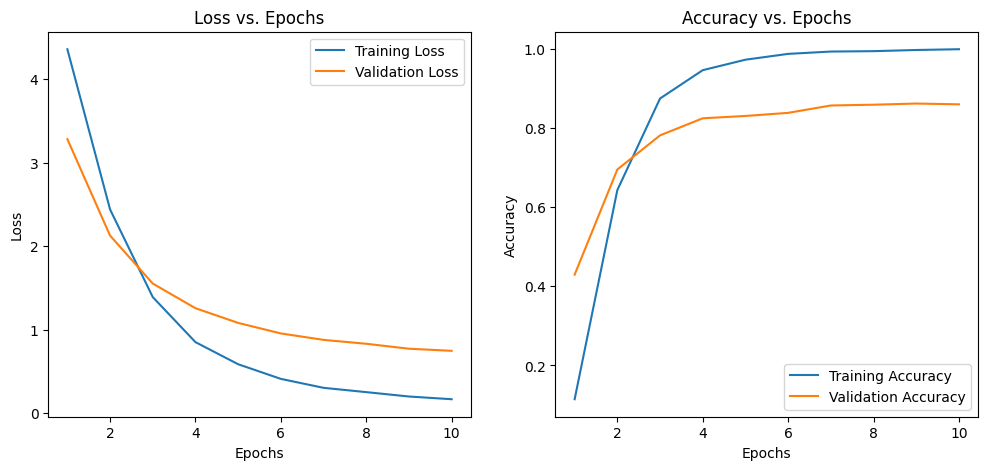

Test Loss: 0.8240, Test Accuracy: 0.8432


In [6]:
# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations for train, validation, and test datasets
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Download the Oxford 102 Flower dataset
train_dataset = datasets.Flowers102(
    root='./data', split='train', download=True, transform=transform
)
val_dataset = datasets.Flowers102(
    root='./data', split='val', download=True, transform=transform
)
test_dataset = datasets.Flowers102(
    root='./data', split='test', download=True, transform=transform
)

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load MobileNetV2 pre-trained on ImageNet
mobilenet_v2 = models.mobilenet_v2(pretrained=True)

# Freeze the feature extraction layers
for param in mobilenet_v2.features.parameters():
    param.requires_grad = False

# Replace the classifier with a new layer for 102 classes
mobilenet_v2.classifier[1] = nn.Linear(mobilenet_v2.last_channel, 102)

# Move the model to the appropriate device
mobilenet_v2 = mobilenet_v2.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mobilenet_v2.classifier.parameters(), lr=0.001)

# Training and validation
num_epochs = 10
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(num_epochs):
    # Training phase
    mobilenet_v2.train()
    train_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = mobilenet_v2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(correct / total)

    # Validation phase
    mobilenet_v2.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = mobilenet_v2(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(correct / total)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label="Training Loss")
plt.plot(range(1, num_epochs+1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label="Training Accuracy")
plt.plot(range(1, num_epochs+1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Epochs")
plt.legend()

plt.show()

# Evaluate on the test dataset
mobilenet_v2.eval()
test_loss, correct, total = 0, 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = mobilenet_v2(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f"Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_accuracy:.4f}")


# **Part d:**

In this section, we want to explore different options for feature extraction networks and compare the results obtained from various networks. Use the VGG16 and ResNet50 networks for feature extraction, along with MobileNetV2 as previously implemented. Repeat the tasks from the previous sections and retrain the classification layers. Compare the following for each network:

* The total number of parameters and the number of trainable parameters (using PyTorch).
  
* The final accuracy obtained from each network on the test data.

  
Analyze and compare the results for VGG16, ResNet50, and MobileNetV2.

---


Training MobileNetV2...
Epoch [1/10], Train Loss: 4.4233, Val Loss: 3.3098
Epoch [2/10], Train Loss: 2.4496, Val Loss: 2.1651
Epoch [3/10], Train Loss: 1.4331, Val Loss: 1.5730
Epoch [4/10], Train Loss: 0.8846, Val Loss: 1.2776
Epoch [5/10], Train Loss: 0.6049, Val Loss: 1.0782
Epoch [6/10], Train Loss: 0.4397, Val Loss: 0.9709
Epoch [7/10], Train Loss: 0.3174, Val Loss: 0.8939
Epoch [8/10], Train Loss: 0.2496, Val Loss: 0.8249
Epoch [9/10], Train Loss: 0.2002, Val Loss: 0.7818
Epoch [10/10], Train Loss: 0.1654, Val Loss: 0.7540
MobileNetV2 Test Accuracy: 0.8455
Total Parameters: 2354534, Trainable Parameters: 130662
Training VGG16...
Epoch [1/10], Train Loss: 3.8333, Val Loss: 2.2282
Epoch [2/10], Train Loss: 1.3405, Val Loss: 1.4935
Epoch [3/10], Train Loss: 0.7614, Val Loss: 1.2550
Epoch [4/10], Train Loss: 0.5662, Val Loss: 1.1737
Epoch [5/10], Train Loss: 0.4068, Val Loss: 1.0840
Epoch [6/10], Train Loss: 0.2911, Val Loss: 1.0321
Epoch [7/10], Train Loss: 0.2398, Val Loss: 1.0220


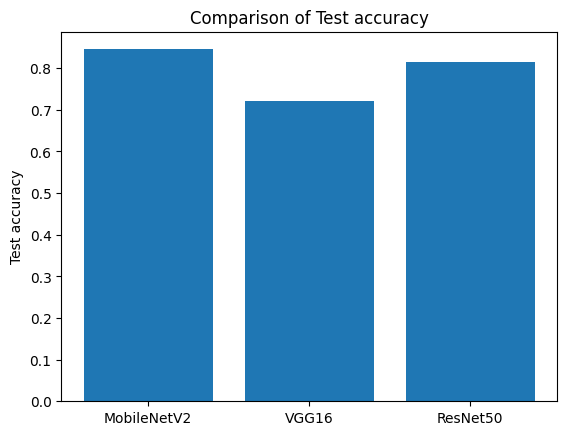

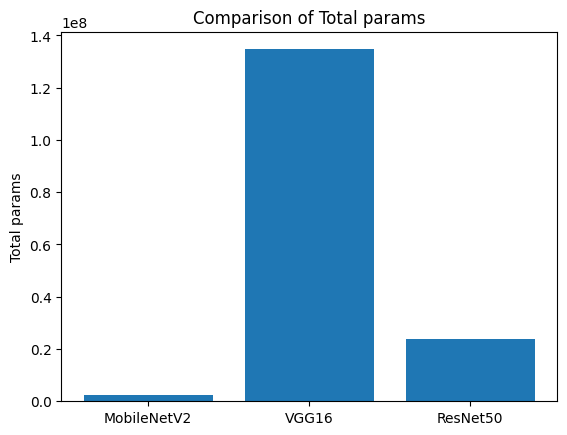

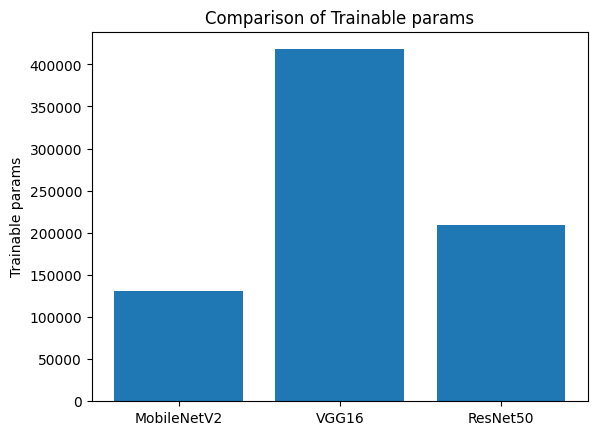

In [8]:
# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations for train, validation, and test datasets
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the Oxford 102 Flower dataset
train_dataset = datasets.Flowers102(root='./data', split='train', download=True, transform=transform)
val_dataset = datasets.Flowers102(root='./data', split='val', download=True, transform=transform)
test_dataset = datasets.Flowers102(root='./data', split='test', download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Function to freeze feature extractor layers
def freeze_features(model):
    for param in model.parameters():
        param.requires_grad = False

# Function to train and evaluate a model
def train_and_evaluate(model, num_classes=102, num_epochs=10):
    # Replace the classifier head
    if isinstance(model, models.MobileNetV2):
        model.classifier[1] = nn.Linear(model.last_channel, num_classes)
    elif isinstance(model, models.ResNet):
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif isinstance(model, models.VGG):
        model.classifier[6] = nn.Linear(4096, num_classes)
    
    model = model.to(device)
    
    # Define loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
    
    # Lists for storing losses and accuracies
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss, correct, total = 0, 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(correct / total)
        
        # Validation phase
        model.eval()
        val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(correct / total)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")
    
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# Function to compute the number of parameters
def count_parameters(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params

# Models to compare
models_to_compare = {
    "MobileNetV2": models.mobilenet_v2(pretrained=True),
    "VGG16": models.vgg16(pretrained=True),
    "ResNet50": models.resnet50(pretrained=True)
}

results = {}
for model_name, model in models_to_compare.items():
    print(f"Training {model_name}...")
    
    # Freeze feature extractor layers
    freeze_features(model)
    
    # Train and evaluate
    trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_and_evaluate(model)
    
    # Evaluate on test dataset
    trained_model.eval()
    test_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = trained_model(images)
            loss = nn.CrossEntropyLoss()(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = correct / total

    # Count parameters
    total_params, trainable_params = count_parameters(trained_model)

    # Store results
    results[model_name] = {
        "train_losses": train_losses,
        "val_losses": val_losses,
        "train_accuracies": train_accuracies,
        "val_accuracies": val_accuracies,
        "test_accuracy": test_accuracy,
        "total_params": total_params,
        "trainable_params": trainable_params
    }

    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")
    print(f"Total Parameters: {total_params}, Trainable Parameters: {trainable_params}")

# Plot comparison results
for metric in ["test_accuracy", "total_params", "trainable_params"]:
    values = [results[model_name][metric] for model_name in models_to_compare.keys()]
    plt.bar(models_to_compare.keys(), values)
    plt.title(f"Comparison of {metric.replace('_', ' ').capitalize()}")
    plt.ylabel(metric.replace('_', ' ').capitalize())
    plt.show()


**Number of Parameters and Trainable Parameters**:
   - **MobileNetV2** has the fewest total parameters (2.35M) and trainable parameters (130K), making it efficient for resource-constrained environments.
   - **VGG16** has the most parameters (134.68M) and trainable parameters (417K), leading to higher computational demands.
   - **ResNet50** strikes a balance with 23.7M total parameters and 209K trainable parameters, being more efficient than VGG16.

**Accuracy**:
   - **MobileNetV2** achieves the highest accuracy (84.55%), balancing performance and efficiency.
   - **ResNet50** performs well with 81.43% accuracy, benefiting from residual connections.
   - **VGG16** has the lowest accuracy (72.17%) despite its large parameter count, possibly due to overfitting.

**Comparison**:
   - **MobileNetV2** is the most efficient and accurate for this task.
   - **ResNet50** provides a good middle ground.
   - **VGG16** struggles with generalization despite its large size.

In conclusion, MobileNetV2 is the best choice for this classification task due to its high accuracy and low computational cost.

# **Part e:**

In the previous sections of the exercise, you used pre-trained weights for feature extraction. In this section, we will investigate how useful the initial knowledge gained from Transfer Learning is for our classification problem. For this purpose, consider the MobileNetV2 network again, but this time use random weights for initialization. Add the classification layers and train the network from scratch on the Oxford 102 Flower dataset. Similar to before, plot the accuracy and loss curves for the training and validation data during training, and report the final accuracy and loss for the training, validation, and test datasets after completing the training. Compare and analyze the final accuracies with those from section C.

---

Epoch [1/10], Train Loss: 4.8520, Val Loss: 4.9999
Epoch [2/10], Train Loss: 4.3612, Val Loss: 5.6131
Epoch [3/10], Train Loss: 4.0038, Val Loss: 4.1448
Epoch [4/10], Train Loss: 3.6188, Val Loss: 4.5321
Epoch [5/10], Train Loss: 3.3882, Val Loss: 4.1889
Epoch [6/10], Train Loss: 3.1678, Val Loss: 4.4537
Epoch [7/10], Train Loss: 3.0468, Val Loss: 4.8352
Epoch [8/10], Train Loss: 2.9361, Val Loss: 4.0795
Epoch [9/10], Train Loss: 2.6520, Val Loss: 3.4867
Epoch [10/10], Train Loss: 2.5674, Val Loss: 4.5793
MobileNetV2 (from scratch) Test Accuracy: 0.0903
Total Parameters: 2354534, Trainable Parameters: 2354534


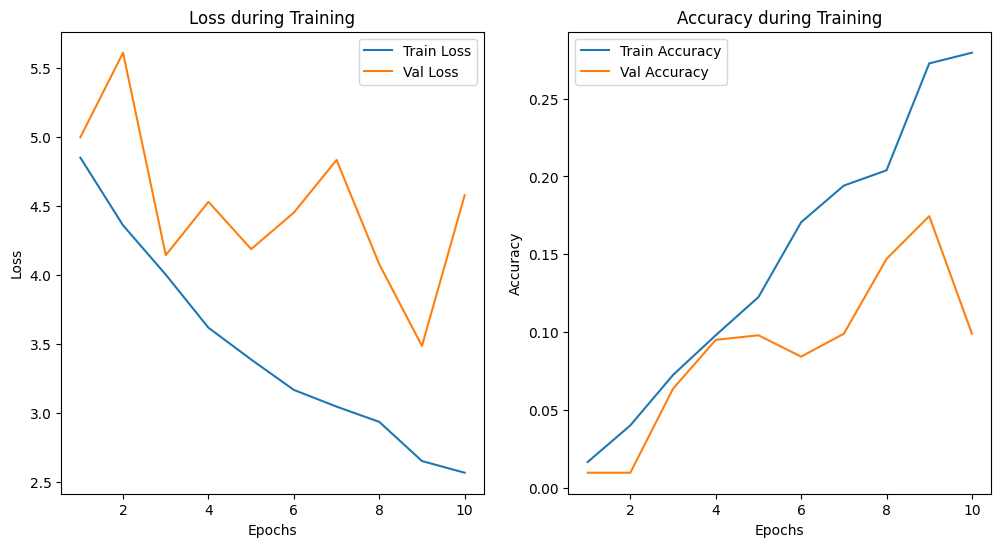

In [13]:
# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations for train, validation, and test datasets
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the Oxford 102 Flower dataset
train_dataset = datasets.Flowers102(root='./data', split='train', download=True, transform=transform)
val_dataset = datasets.Flowers102(root='./data', split='val', download=True, transform=transform)
test_dataset = datasets.Flowers102(root='./data', split='test', download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Function to train and evaluate a model
def train_and_evaluate(model, num_classes=102, num_epochs=10):
    # Replace the classifier head
    model.classifier[1] = nn.Linear(model.last_channel, num_classes)
    
    model = model.to(device)
    
    # Define loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Lists for storing losses and accuracies
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss, correct, total = 0, 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(correct / total)
        
        # Validation phase
        model.eval()
        val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(correct / total)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")
    
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# Function to compute the number of parameters
def count_parameters(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params

# Initialize MobileNetV2 from scratch
mobile_net_v2_scratch = models.mobilenet_v2(pretrained=False)

# Train and evaluate the model
trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_and_evaluate(mobile_net_v2_scratch)

# Evaluate on test dataset
trained_model.eval()
test_loss, correct, total = 0, 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = trained_model(images)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_accuracy = correct / total

# Count parameters
total_params, trainable_params = count_parameters(trained_model)

# Print results
print(f"MobileNetV2 (from scratch) Test Accuracy: {test_accuracy:.4f}")
print(f"Total Parameters: {total_params}, Trainable Parameters: {trainable_params}")

# Plot training and validation loss and accuracy
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss during Training')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy during Training')
plt.legend()

plt.show()



In this experiment, we compared the performance of MobileNetV2 with pre-trained weights (from part D) and MobileNetV2 trained from scratch (from part E) on the Oxford 102 Flower dataset. The pre-trained MobileNetV2 achieved a test accuracy of 84.55%, with 130,662 trainable parameters, demonstrating the effectiveness of transfer learning. This model showed steady improvement in both training and validation losses, benefiting from the knowledge gained from large-scale datasets like ImageNet. In contrast, the MobileNetV2 model trained from scratch achieved only a test accuracy of 9.03%, with all parameters being trainable. The poor performance of the model trained from scratch highlights the challenges of learning useful features without pre-trained knowledge, especially when working with smaller datasets. Overall, the results underscore the importance of transfer learning, where pre-trained models significantly enhance performance by providing a strong foundation for tasks like flower classification.